In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from iminuit import Minuit   
from scipy import stats
from scipy.stats import linregress
import sys
import pandas as pd

sys.path.append(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\AppStats\AppStat2023\External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax

In [3]:
bdu = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2022bdu_data.snana (1).txt"
tsh = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2022tsh_data.snana (2).txt"
cpt = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2023cpt_data.snana (2).txt"
sar = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2023sar_data.snana.txt"
mee = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2023mee_data.snana.txt"
iwy = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2023iwy_data.snana.txt"
qzm = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2023qzm_data.snana.txt"
oqm = r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photometry\2022oqm_data.snana.txt"

41
41


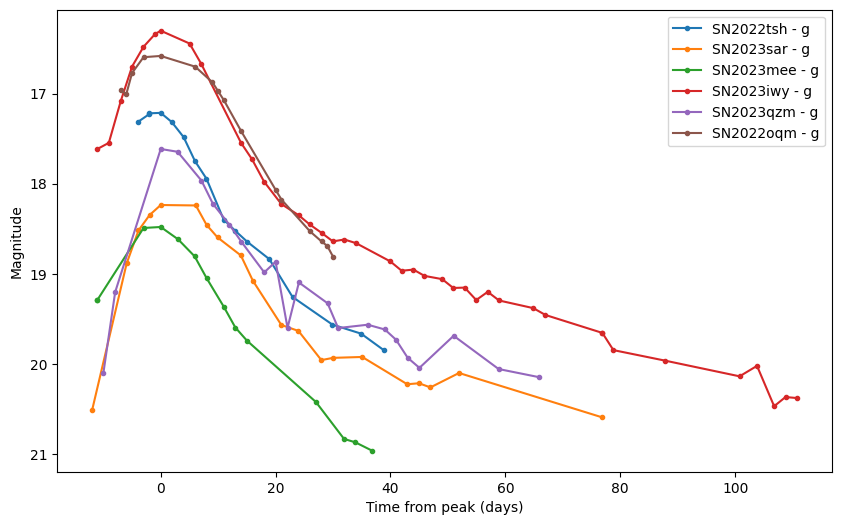

In [140]:
df_bdu = pd.read_csv(bdu, sep = '\s+')
df_tsh = pd.read_csv(tsh, sep = '\s+')
df_cpt = pd.read_csv(cpt, sep = '\s+')
df_sar = pd.read_csv(sar, sep = '\s+')
df_mee = pd.read_csv(mee, sep = '\s+')
df_iwy = pd.read_csv(iwy, sep = '\s+')
df_qzm = pd.read_csv(qzm, sep = '\s+')
df_oqm = pd.read_csv(oqm, sep = '\s+')

bdu_time_orange = df_bdu['MJD'][df_bdu['FLT']=='orange']
bdu_time_cyan = df_bdu['MJD'][df_bdu['FLT']=='cyan']
tsh_time_g = df_tsh['MJD'][df_tsh['FLT']=='g']
tsh_time_orange = df_tsh['MJD'][df_tsh['FLT']=='orange']
cpt_time_orange = df_cpt['MJD'][df_cpt['FLT']=='orange']
cpt_time_u = df_cpt['MJD'][df_cpt['FLT']=='U']
cpt_time_b = df_cpt['MJD'][df_cpt['FLT']=='B']
cpt_time_v = df_cpt['MJD'][df_cpt['FLT']=='V']
sar_time_g = df_sar['MJD'][df_sar['FLT']=='g']
sar_time_r = df_sar['MJD'][df_sar['FLT']=='r']
sar_time_orange = df_sar['MJD'][df_sar['FLT']=='orange']
sar_time_cyan = df_sar['MJD'][df_sar['FLT']=='cyan']
mee_time_g = df_mee['MJD'][df_mee['FLT']=='g']
mee_time_r = df_mee['MJD'][df_mee['FLT']=='r']
iwy_time_g = df_iwy['MJD'][df_iwy['FLT']=='g']
iwy_time_r = df_iwy['MJD'][df_iwy['FLT']=='r']
iwy_time_orange = df_iwy['MJD'][df_iwy['FLT']=='orange']
qzm_time_g = df_qzm['MJD'][df_qzm['FLT']=='g']
qzm_time_r = df_qzm['MJD'][df_qzm['FLT']=='r']
oqm_time_g = df_oqm['MJD'][df_oqm['FLT']=='g']
oqm_time_r = df_oqm['MJD'][df_oqm['FLT']=='r']
oqm_time_z = df_oqm['MJD'][df_oqm['FLT']=='z']
oqm_time_orange = df_oqm['MJD'][df_oqm['FLT']=='orange']

bdu_mag_orange = df_bdu['MAG'][df_bdu['FLT']=='orange']
bdu_mag_cyan = df_bdu['MAG'][df_bdu['FLT']=='cyan']
tsh_mag_g = df_tsh['MAG'][df_tsh['FLT']=='g']
tsh_mag_orange = df_tsh['MAG'][df_tsh['FLT']=='orange']
cpt_mag_orange = df_cpt['MAG'][df_cpt['FLT']=='orange']
cpt_mag_u = df_cpt['MAG'][df_cpt['FLT']=='U']
cpt_mag_b = df_cpt['MAG'][df_cpt['FLT']=='B']
cpt_mag_v = df_cpt['MAG'][df_cpt['FLT']=='V']
sar_mag_g = df_sar['MAG'][df_sar['FLT']=='g']
sar_mag_r = df_sar['MAG'][df_sar['FLT']=='r']
sar_mag_orange = df_sar['MAG'][df_sar['FLT']=='orange']
sar_mag_cyan = df_sar['MAG'][df_sar['FLT']=='cyan']
mee_mag_g = df_mee['MAG'][df_mee['FLT']=='g']
mee_mag_r = df_mee['MAG'][df_mee['FLT']=='r']
iwy_mag_g = df_iwy['MAG'][df_iwy['FLT']=='g']
iwy_mag_r = df_iwy['MAG'][df_iwy['FLT']=='r']
iwy_mag_orange = df_iwy['MAG'][df_iwy['FLT']=='orange']
qzm_mag_g = df_qzm['MAG'][df_qzm['FLT']=='g']
qzm_mag_r = df_qzm['MAG'][df_qzm['FLT']=='r']
oqm_mag_g = df_oqm['MAG'][df_oqm['FLT']=='g']
oqm_mag_r = df_oqm['MAG'][df_oqm['FLT']=='r']
oqm_mag_z = df_oqm['MAG'][df_oqm['FLT']=='z']
oqm_mag_orange = df_oqm['MAG'][df_oqm['FLT']=='orange']

err_bdu_mag_orange = df_bdu['MAGERR'][df_bdu['FLT']=='orange']
err_bdu_mag_cyan = df_bdu['MAGERR'][df_bdu['FLT']=='cyan']
err_tsh_mag_g = df_tsh['MAGERR'][df_tsh['FLT']=='g']
err_tsh_mag_orange = df_tsh['MAGERR'][df_tsh['FLT']=='orange']
err_cpt_mag_orange = df_cpt['MAGERR'][df_cpt['FLT']=='orange']
err_cpt_mag_u = df_cpt['MAGERR'][df_cpt['FLT']=='U']
err_cpt_mag_b = df_cpt['MAGERR'][df_cpt['FLT']=='B']
err_cpt_mag_v = df_cpt['MAGERR'][df_cpt['FLT']=='V']
err_sar_mag_g = df_sar['MAGERR'][df_sar['FLT']=='g']
err_sar_mag_r = df_sar['MAGERR'][df_sar['FLT']=='r']
err_sar_mag_orange = df_sar['MAGERR'][df_sar['FLT']=='orange']
err_sar_mag_cyan = df_sar['MAGERR'][df_sar['FLT']=='cyan']
err_mee_mag_g = df_mee['MAGERR'][df_mee['FLT']=='g']
err_mee_mag_r = df_mee['MAGERR'][df_mee['FLT']=='r']
err_iwy_mag_g = df_iwy['MAGERR'][df_iwy['FLT']=='g']
err_iwy_mag_r = df_iwy['MAGERR'][df_iwy['FLT']=='r']
err_iwy_mag_orange = df_iwy['MAGERR'][df_iwy['FLT']=='orange']
err_qzm_mag_g = df_qzm['MAGERR'][df_qzm['FLT']=='g']
err_qzm_mag_r = df_qzm['MAGERR'][df_qzm['FLT']=='r']
err_oqm_mag_g = df_oqm['MAGERR'][df_oqm['FLT']=='g']
err_oqm_mag_r = df_oqm['MAGERR'][df_oqm['FLT']=='r']
err_oqm_mag_z = df_oqm['MAGERR'][df_oqm['FLT']=='z']
err_oqm_mag_orange = df_oqm['MAGERR'][df_oqm['FLT']=='orange']

max_bdu = np.min(bdu_mag_orange)
max_tsh = np.min(tsh_mag_g)
max_cpt = np.min(cpt_mag_orange)
max_sar = np.min(sar_mag_g)
max_mee = np.min(mee_mag_g)
max_iwy = np.min(iwy_mag_g)
max_qzm = np.min(qzm_mag_g)
max_oqm = np.min(oqm_mag_g)

time_max_bdu = bdu_time[bdu_mag_orange == max_bdu]
time_max_tsh = tsh_time[tsh_mag_g == max_tsh]
time_max_cpt = cpt_time[cpt_mag_orange == max_cpt]
time_max_sar = sar_time[sar_mag_g == max_sar]
time_max_mee = mee_time[mee_mag_g == max_mee]
time_max_iwy = iwy_time[iwy_mag_g == max_iwy]
time_max_qzm = qzm_time[qzm_mag_g == max_qzm]
time_max_oqm = oqm_time[oqm_mag_g == max_oqm]

bdu_time_norm = bdu_time - np.array(time_max_bdu)
tsh_time_norm = tsh_time - np.array(time_max_tsh)
cpt_time_norm = cpt_time - np.array(time_max_cpt)
sar_time_norm = sar_time - np.array(time_max_sar)
mee_time_norm = mee_time - np.array(time_max_mee)
iwy_time_norm = iwy_time - np.array(time_max_iwy)
qzm_time_norm = qzm_time - np.array(time_max_qzm)
oqm_time_norm = oqm_time - np.array(time_max_oqm)

plt.figure(figsize=(10, 6))

# plt.plot(bdu_time_norm, bdu_mag_orange, marker='.', label = 'SN2022bdu - orange')
plt.plot(tsh_time_norm, tsh_mag_g, marker='.', label = 'SN2022tsh - g')
# plt.plot(cpt_time_norm, cpt_mag_orange, marker='.', label = 'SN2023cpt - orange')
plt.plot(sar_time_norm, sar_mag_g, marker='.', label = 'SN2023sar - g')
plt.plot(mee_time_norm, mee_mag_g, marker='.', label = 'SN2023mee - g')
plt.plot(iwy_time_norm, iwy_mag_g, marker='.', label = 'SN2023iwy - g')
plt.plot(qzm_time_norm, qzm_mag_g, marker='.', label = 'SN2023qzm - g')
plt.plot(oqm_time_norm, oqm_mag_g, marker='.', label = 'SN2022oqm - g')

plt.gca().invert_yaxis()

plt.xlabel('Time from peak (days)')
plt.ylabel('Magnitude')
plt.legend()

print(len(bdu_mag_orange))
print(len(bdu_time))

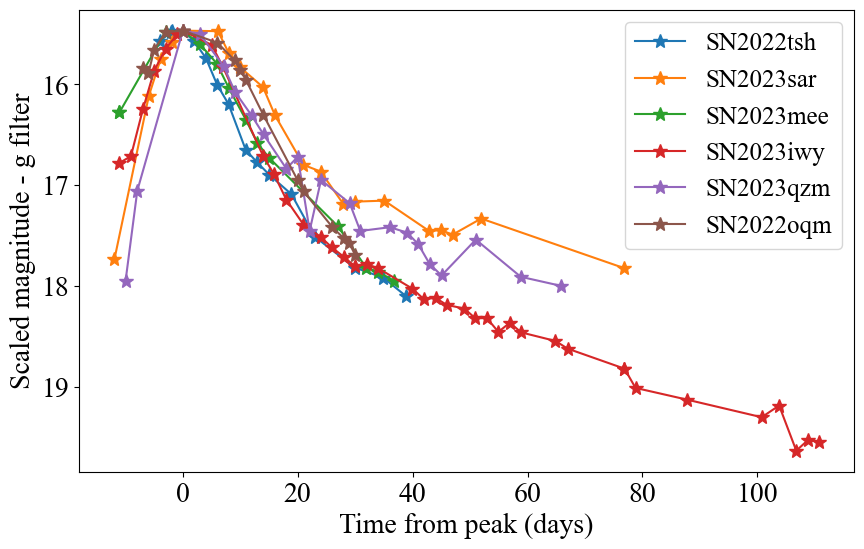

In [5]:
cpt_min_mag = np.min(cpt_mag_orange)

diff_bdu = np.min(bdu_mag_orange) - cpt_min_mag
diff_tsh = np.min(tsh_mag_g) - cpt_min_mag
diff_cpt = np.min(cpt_mag_orange) - cpt_min_mag
diff_sar = np.min(sar_mag_g) - cpt_min_mag
diff_mee = np.min(mee_mag_g) - cpt_min_mag
diff_iwy = np.min(iwy_mag_g) - cpt_min_mag
diff_qzm = np.min(qzm_mag_g) - cpt_min_mag
diff_oqm = np.min(oqm_mag_g) - cpt_min_mag

bdu_mag_norm = bdu_mag_orange - diff_bdu
tsh_mag_norm = tsh_mag_g - diff_tsh
cpt_mag_norm = cpt_mag_orange - diff_cpt
sar_mag_norm = sar_mag_g - diff_sar
mee_mag_norm = mee_mag_g - diff_mee
iwy_mag_norm = iwy_mag_g - diff_iwy
qzm_mag_norm = qzm_mag_g - diff_qzm
oqm_mag_norm = oqm_mag_g - diff_oqm

plt.figure(figsize=(10, 6))

plt.gca().invert_yaxis()

# plt.plot(bdu_time_norm, bdu_mag_norm, marker='*', label = 'SN2022bdu')
plt.plot(tsh_time_norm, tsh_mag_norm, marker='*', markersize=10, label = 'SN2022tsh')
# plt.plot(cpt_time_norm, cpt_mag_norm, marker='*', label = 'SN2023cpt')
plt.plot(sar_time_norm, sar_mag_norm, marker='*', markersize=10, label = 'SN2023sar')
plt.plot(mee_time_norm, mee_mag_norm, marker='*', markersize=10, label = 'SN2023mee')
plt.plot(iwy_time_norm, iwy_mag_norm, marker='*', markersize=10, label = 'SN2023iwy')
plt.plot(qzm_time_norm, qzm_mag_norm, marker='*', markersize=10, label = 'SN2023qzm')
plt.plot(oqm_time_norm, oqm_mag_norm, marker='*', markersize=10, label = 'SN2022oqm')

plt.xlabel('Time from peak (days)', fontdict={'fontsize': 20, 'fontname': 'Times New Roman'})
plt.ylabel('Scaled magnitude - g filter', fontdict={'fontsize': 20, 'fontname': 'Times New Roman'})

plt.xticks(fontsize=20, fontname = 'Times New Roman')
plt.yticks(fontsize=20, fontname = 'Times New Roman')
plt.legend(fontsize=17, prop={'family': 'Times New Roman', 'size': 18})

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\all_photometry_g.pdf", dpi=200)

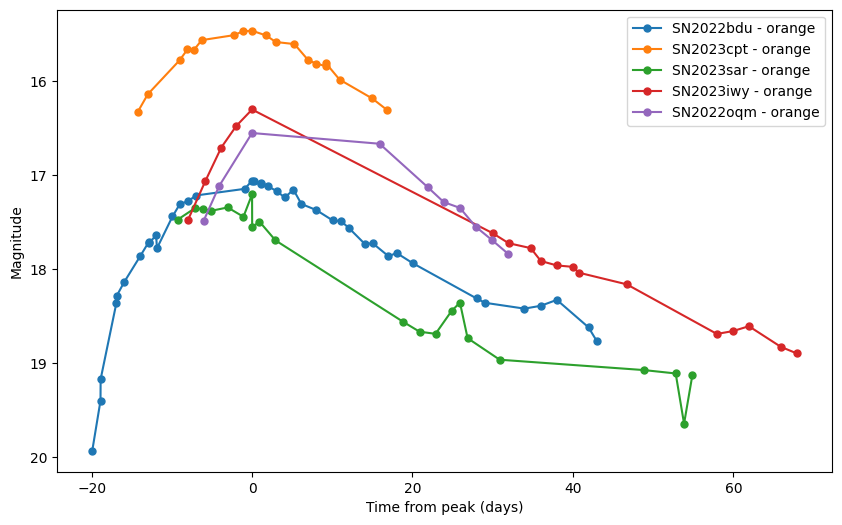

In [6]:
df_bdu = pd.read_csv(bdu, sep = '\s+')
df_tsh = pd.read_csv(tsh, sep = '\s+')
df_cpt = pd.read_csv(cpt, sep = '\s+')
df_sar = pd.read_csv(sar, sep = '\s+')
df_mee = pd.read_csv(mee, sep = '\s+')
df_iwy = pd.read_csv(iwy, sep = '\s+')
df_qzm = pd.read_csv(qzm, sep = '\s+')
df_oqm = pd.read_csv(oqm, sep = '\s+')

bdu_time = df_bdu['MJD'][df_bdu['FLT']=='orange']
# tsh_time = df_tsh['MJD'][df_tsh['FLT']=='g']
cpt_time = df_cpt['MJD'][df_cpt['FLT']=='orange']
sar_time = df_sar['MJD'][df_sar['FLT']=='orange']
# mee_time = df_mee['MJD'][df_mee['FLT']=='g']
iwy_time = df_iwy['MJD'][df_iwy['FLT']=='orange']
# qzm_time = df_qzm['MJD'][df_qzm['FLT']=='g']
oqm_time = df_oqm['MJD'][df_oqm['FLT']=='orange']

bdu_mag_orange = df_bdu['MAG'][df_bdu['FLT']=='orange']
# tsh_mag_g = df_tsh['MAG'][df_tsh['FLT']=='g']
cpt_mag_orange = df_cpt['MAG'][df_cpt['FLT']=='orange']
sar_mag_g = df_sar['MAG'][df_sar['FLT']=='orange']
# mee_mag_g = df_mee['MAG'][df_mee['FLT']=='g']
iwy_mag_g = df_iwy['MAG'][df_iwy['FLT']=='orange']
# qzm_mag_g = df_qzm['MAG'][df_qzm['FLT']=='g']
oqm_mag_g = df_oqm['MAG'][df_oqm['FLT']=='orange']

max_bdu = np.min(bdu_mag_orange)
max_tsh = np.min(tsh_mag_g)
max_cpt = np.min(cpt_mag_orange)
max_sar = np.min(sar_mag_g)
max_mee = np.min(mee_mag_g)
max_iwy = np.min(iwy_mag_g)
max_qzm = np.min(qzm_mag_g)
max_oqm = np.min(oqm_mag_g)

time_max_bdu = bdu_time[bdu_mag_orange == max_bdu]
time_max_tsh = tsh_time[tsh_mag_g == max_tsh]
time_max_cpt = cpt_time[cpt_mag_orange == max_cpt]
time_max_sar = sar_time[sar_mag_g == max_sar]
time_max_mee = mee_time[mee_mag_g == max_mee]
time_max_iwy = iwy_time[iwy_mag_g == max_iwy]
time_max_qzm = qzm_time[qzm_mag_g == max_qzm]
time_max_oqm = oqm_time[oqm_mag_g == max_oqm]

bdu_time_norm = bdu_time - np.array(time_max_bdu)
tsh_time_norm = tsh_time - np.array(time_max_tsh)
cpt_time_norm = cpt_time - np.array(time_max_cpt)
sar_time_norm = sar_time - np.array(time_max_sar)
mee_time_norm = mee_time - np.array(time_max_mee)
iwy_time_norm = iwy_time - np.array(time_max_iwy)
qzm_time_norm = qzm_time - np.array(time_max_qzm)
oqm_time_norm = oqm_time - np.array(time_max_oqm)

plt.figure(figsize=(10, 6))

plt.plot(bdu_time_norm, bdu_mag_orange, marker='.', markersize=10, label = 'SN2022bdu - orange')
# plt.plot(tsh_time_norm, tsh_mag_g, marker='.', label = 'SN2022tsh - g')
plt.plot(cpt_time_norm, cpt_mag_orange, marker='.', markersize=10, label = 'SN2023cpt - orange')
plt.plot(sar_time_norm, sar_mag_g, marker='.', markersize=10, label = 'SN2023sar - orange')
# plt.plot(mee_time_norm, mee_mag_g, marker='.', label = 'SN2023mee - g')
plt.plot(iwy_time_norm, iwy_mag_g, marker='.', markersize=10, label = 'SN2023iwy - orange')
# plt.plot(qzm_time_norm, qzm_mag_g, marker='.', label = 'SN2023qzm - g')
plt.plot(oqm_time_norm, oqm_mag_g, marker='.', markersize=10, label = 'SN2022oqm - orange')

plt.gca().invert_yaxis()

plt.xlabel('Time from peak (days)')
plt.ylabel('Magnitude')
plt.legend()


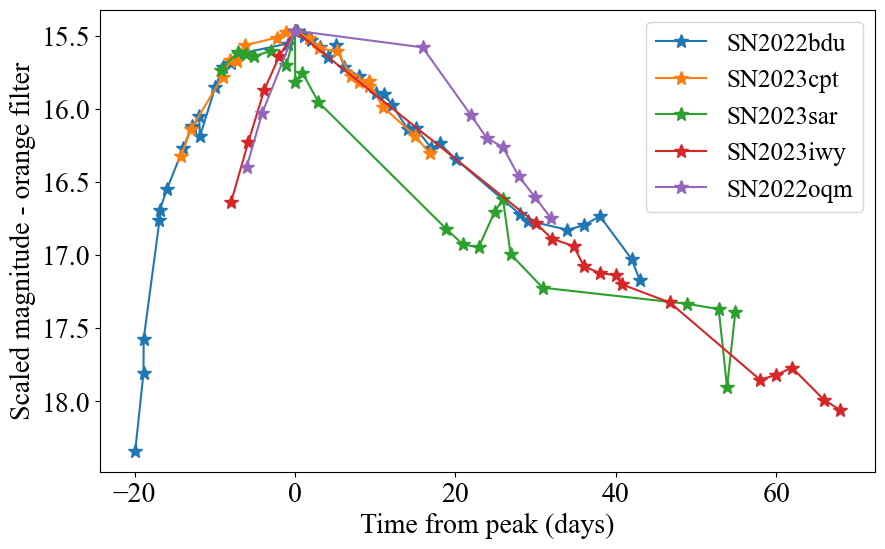

In [7]:
cpt_min_mag = np.min(cpt_mag_orange)

diff_bdu = np.min(bdu_mag_orange) - cpt_min_mag
# diff_tsh = np.min(tsh_mag_g) - cpt_min_mag
diff_cpt = np.min(cpt_mag_orange) - cpt_min_mag
diff_sar = np.min(sar_mag_g) - cpt_min_mag
# diff_mee = np.min(mee_mag_g) - cpt_min_mag
diff_iwy = np.min(iwy_mag_g) - cpt_min_mag
# diff_qzm = np.min(qzm_mag_g) - cpt_min_mag
diff_oqm = np.min(oqm_mag_g) - cpt_min_mag

bdu_mag_norm = bdu_mag_orange - diff_bdu
# tsh_mag_norm = tsh_mag_g - diff_tsh
cpt_mag_norm = cpt_mag_orange - diff_cpt
sar_mag_norm = sar_mag_g - diff_sar
# mee_mag_norm = mee_mag_g - diff_mee
iwy_mag_norm = iwy_mag_g - diff_iwy
# qzm_mag_norm = qzm_mag_g - diff_qzm
oqm_mag_norm = oqm_mag_g - diff_oqm

plt.figure(figsize=(10, 6))

plt.gca().invert_yaxis()

plt.plot(bdu_time_norm, bdu_mag_norm, marker='*', markersize=10, label = 'SN2022bdu')
# plt.plot(tsh_time_norm, tsh_mag_norm, marker='*', label = 'SN2022tsh')
plt.plot(cpt_time_norm, cpt_mag_norm, marker='*', markersize=10, label = 'SN2023cpt')
plt.plot(sar_time_norm, sar_mag_norm, marker='*', markersize=10, label = 'SN2023sar')
# plt.plot(mee_time_norm, mee_mag_norm, marker='*', label = 'SN2023mee')
plt.plot(iwy_time_norm, iwy_mag_norm, marker='*', markersize=10, label = 'SN2023iwy')
# plt.plot(qzm_time_norm, qzm_mag_norm, marker='*', label = 'SN2023qzm')
plt.plot(oqm_time_norm, oqm_mag_norm, marker='*', markersize=10, label = 'SN2022oqm')

plt.xlabel('Time from peak (days)', fontdict={'fontsize': 20, 'fontname': 'Times New Roman'})
plt.ylabel('Scaled magnitude - orange filter', fontdict={'fontsize': 20, 'fontname': 'Times New Roman'})

plt.xticks(fontsize=20, fontname = 'Times New Roman')
plt.yticks(fontsize=20, fontname = 'Times New Roman')
plt.legend(fontsize=17, prop={'family': 'Times New Roman', 'size': 18})

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\all_photometry_orange.pdf", dpi=200)

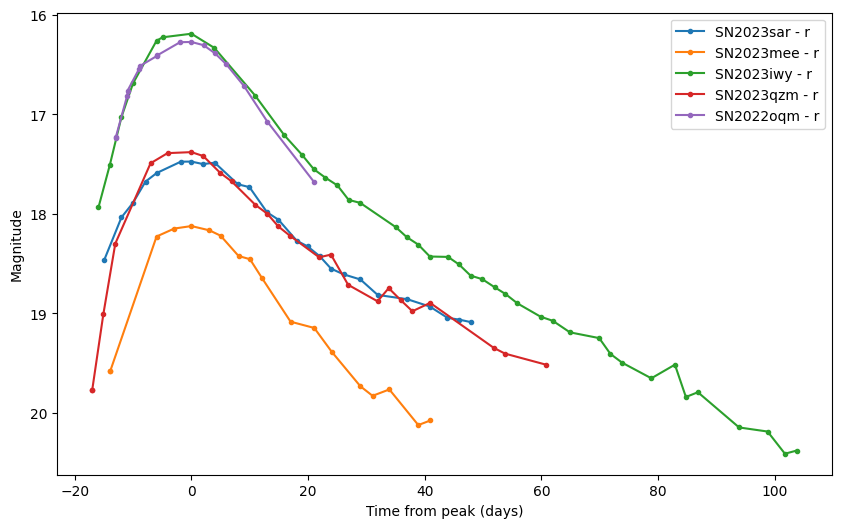

In [8]:
df_bdu = pd.read_csv(bdu, sep = '\s+')
df_tsh = pd.read_csv(tsh, sep = '\s+')
df_cpt = pd.read_csv(cpt, sep = '\s+')
df_sar = pd.read_csv(sar, sep = '\s+')
df_mee = pd.read_csv(mee, sep = '\s+')
df_iwy = pd.read_csv(iwy, sep = '\s+')
df_qzm = pd.read_csv(qzm, sep = '\s+')
df_oqm = pd.read_csv(oqm, sep = '\s+')

# bdu_time = df_bdu['MJD'][df_bdu['FLT']=='orange']
tsh_time = df_tsh['MJD'][df_tsh['FLT']=='r']
# cpt_time = df_cpt['MJD'][df_cpt['FLT']=='orange']
sar_time = df_sar['MJD'][df_sar['FLT']=='r']
mee_time = df_mee['MJD'][df_mee['FLT']=='r']
iwy_time = df_iwy['MJD'][df_iwy['FLT']=='r']
qzm_time = df_qzm['MJD'][df_qzm['FLT']=='r']
oqm_time = df_oqm['MJD'][df_oqm['FLT']=='r']

# bdu_mag_orange = df_bdu['MAG'][df_bdu['FLT']=='orange']
tsh_mag_g = df_tsh['MAG'][df_tsh['FLT']=='r']
# cpt_mag_orange = df_cpt['MAG'][df_cpt['FLT']=='orange']
sar_mag_g = df_sar['MAG'][df_sar['FLT']=='r']
mee_mag_g = df_mee['MAG'][df_mee['FLT']=='r']
iwy_mag_g = df_iwy['MAG'][df_iwy['FLT']=='r']
qzm_mag_g = df_qzm['MAG'][df_qzm['FLT']=='r']
oqm_mag_g = df_oqm['MAG'][df_oqm['FLT']=='r']

max_bdu = np.min(bdu_mag_orange)
max_tsh = np.min(tsh_mag_g)
max_cpt = np.min(cpt_mag_orange)
max_sar = np.min(sar_mag_g)
max_mee = np.min(mee_mag_g)
max_iwy = np.min(iwy_mag_g)
max_qzm = np.min(qzm_mag_g)
max_oqm = np.min(oqm_mag_g)

# time_max_bdu = bdu_time[bdu_mag_orange == max_bdu]
time_max_tsh = tsh_time[tsh_mag_g == max_tsh]
# time_max_cpt = cpt_time[cpt_mag_orange == max_cpt]
time_max_sar = sar_time[sar_mag_g == max_sar]
time_max_mee = mee_time[mee_mag_g == max_mee]
time_max_iwy = iwy_time[iwy_mag_g == max_iwy]
time_max_qzm = qzm_time[qzm_mag_g == max_qzm]
time_max_oqm = oqm_time[oqm_mag_g == max_oqm]

# bdu_time_norm = bdu_time - np.array(time_max_bdu)
tsh_time_norm = tsh_time - np.array(time_max_tsh)
# cpt_time_norm = cpt_time - np.array(time_max_cpt)
sar_time_norm = sar_time - np.array(time_max_sar)
mee_time_norm = mee_time - np.array(time_max_mee)
iwy_time_norm = iwy_time - np.array(time_max_iwy)
qzm_time_norm = qzm_time - np.array(time_max_qzm)
oqm_time_norm = oqm_time - np.array(time_max_oqm)

plt.figure(figsize=(10, 6))

# plt.plot(bdu_time_norm, bdu_mag_orange, marker='.', label = 'SN2022bdu - orange')
# plt.plot(tsh_time_norm, tsh_mag_g, marker='.', label = 'SN2022tsh - r')
# plt.plot(cpt_time_norm, cpt_mag_orange, marker='.', label = 'SN2023cpt - orange')
plt.plot(sar_time_norm, sar_mag_g, marker='.', label = 'SN2023sar - r')
plt.plot(mee_time_norm, mee_mag_g, marker='.', label = 'SN2023mee - r')
plt.plot(iwy_time_norm, iwy_mag_g, marker='.', label = 'SN2023iwy - r')
plt.plot(qzm_time_norm, qzm_mag_g, marker='.', label = 'SN2023qzm - r')
plt.plot(oqm_time_norm, oqm_mag_g, marker='.', label = 'SN2022oqm - r')

plt.gca().invert_yaxis()

plt.xlabel('Time from peak (days)')
plt.ylabel('Magnitude')
plt.legend()


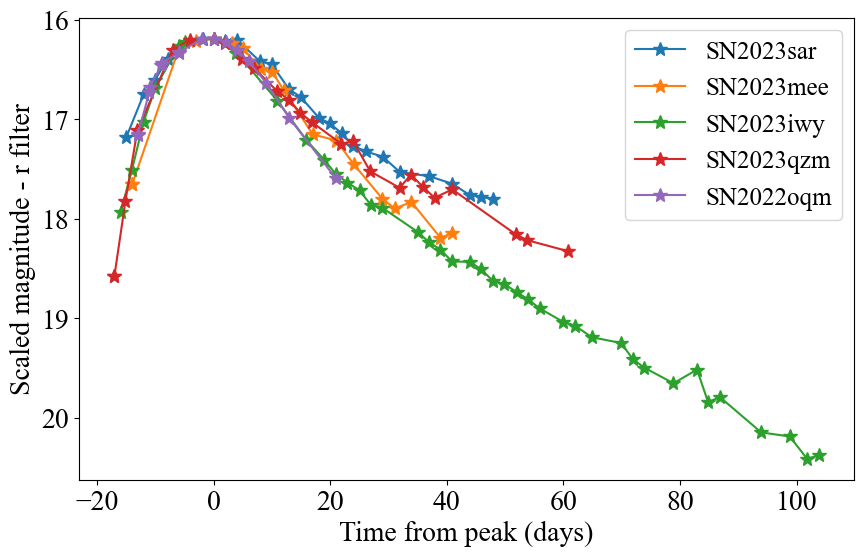

In [9]:
iwy_min_mag = np.min(iwy_mag_g)

# diff_bdu = np.min(bdu_mag_orange) - cpt_min_mag
diff_tsh = np.min(tsh_mag_g) - iwy_min_mag
# diff_cpt = np.min(cpt_mag_orange) - cpt_min_mag
diff_sar = np.min(sar_mag_g) - iwy_min_mag
diff_mee = np.min(mee_mag_g) - iwy_min_mag
diff_iwy = np.min(iwy_mag_g) - iwy_min_mag
diff_qzm = np.min(qzm_mag_g) - iwy_min_mag
diff_oqm = np.min(oqm_mag_g) - iwy_min_mag

# bdu_mag_norm = bdu_mag_orange - diff_bdu
tsh_mag_norm = tsh_mag_g - diff_tsh
# cpt_mag_norm = cpt_mag_orange - diff_cpt
sar_mag_norm = sar_mag_g - diff_sar
mee_mag_norm = mee_mag_g - diff_mee
iwy_mag_norm = iwy_mag_g - diff_iwy
qzm_mag_norm = qzm_mag_g - diff_qzm
oqm_mag_norm = oqm_mag_g - diff_oqm

plt.figure(figsize=(10, 6))

plt.gca().invert_yaxis()

# plt.plot(bdu_time_norm, bdu_mag_norm, marker='*', label = 'SN2022bdu')
# plt.plot(tsh_time_norm, tsh_mag_norm, marker='*', label = 'SN2022tsh')
# plt.plot(cpt_time_norm, cpt_mag_norm, marker='*', label = 'SN2023cpt')
plt.plot(sar_time_norm, sar_mag_norm, marker='*', markersize=10, label = 'SN2023sar')
plt.plot(mee_time_norm, mee_mag_norm, marker='*', markersize=10, label = 'SN2023mee')
plt.plot(iwy_time_norm, iwy_mag_norm, marker='*', markersize=10, label = 'SN2023iwy')
plt.plot(qzm_time_norm, qzm_mag_norm, marker='*', markersize=10, label = 'SN2023qzm')
plt.plot(oqm_time_norm, oqm_mag_norm, marker='*', markersize=10, label = 'SN2022oqm')

plt.xlabel('Time from peak (days)', fontdict={'fontsize': 20, 'fontname': 'Times New Roman'})
plt.ylabel('Scaled magnitude - r filter', fontdict={'fontsize': 20, 'fontname': 'Times New Roman'})

plt.xticks(fontsize=20, fontname = 'Times New Roman')
plt.yticks(fontsize=20, fontname = 'Times New Roman')
plt.legend(fontsize=17, prop={'family': 'Times New Roman', 'size': 18})

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\all_photometry_r.pdf", dpi=200)

In [157]:
x = oqm_time_orange
y = oqm_mag_orange
sy = err_oqm_mag_orange

Nvar = 1    # Number of variables 
Npoints = len(x)
Ndof_calc = Npoints - Nvar   # Number of degrees of freedom = Number of data points - Number of variables

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**(2) / (2 * sigma**(2)))

y_normalized = y - np.max(y)

# Invert the normalized y-values
bdu_mag_orange_fit = (y_normalized)*(-1)


chi2_object = Chi2Regression(gaussian, x , bdu_mag_orange_fit, sy)
minuit = Minuit(chi2_object, A=2.5, mu=59785, sigma=15)  # print_level=1 gives more details

minuit.migrad()  # perform the actual fit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 63.88                      │              Nfcn = 120              │
│ EDM = 2.22e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │   1.493   │   0.026   │            │            │         │         │       │
│ 1 │ mu    │59.78618e3 │ 0.00017e3 │            │            │         │         │       │
│ 2 │ sigma │   10.43   │   0.15    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        A       mu    sigma │
├───────┼────────────────────────────┤
│     A │ 0.000665  -2.3e-3  -2.3e-3 │
│    mu │  -2.3e-3    0.029   -0.004 │
│ sigma │  -2.3e-3   -0.004   0.0235 │
└───────┴────────────────────────────┘

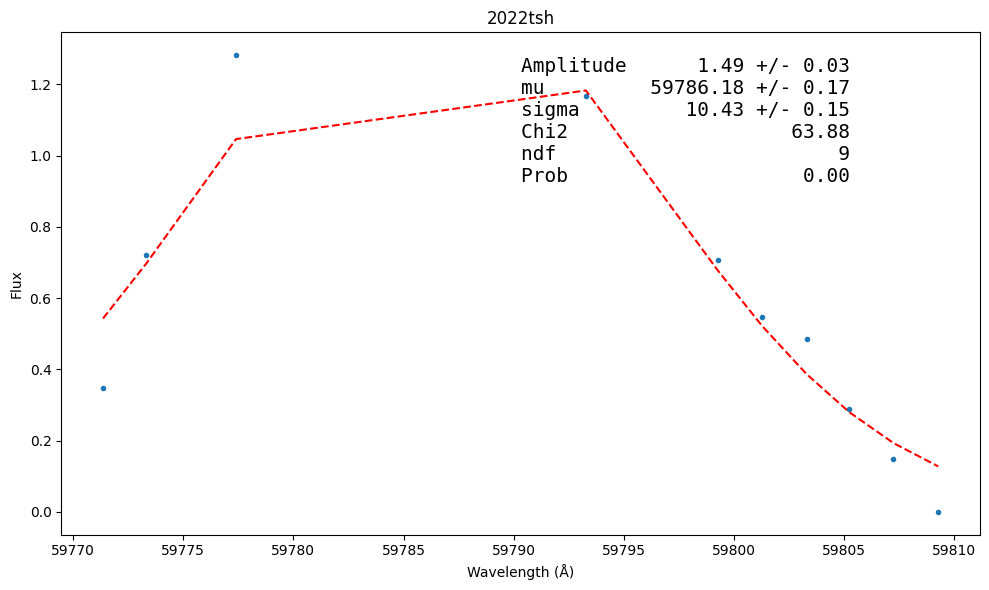

In [158]:
minuit_output = [minuit.fmin, minuit.params] # save the output parameters in case needed

A_fit_tsh = minuit.values['A']
sigma_A_fit_tsh = minuit.errors['A']
sigma_fit_tsh = minuit.values['sigma']
sigma_sigma_fit_tsh = minuit.errors['sigma']
mu_fit_tsh = minuit.values['mu']
sigma_mu_fit_tsh = minuit.errors['mu']

# In Minuit, you can just ask the fit function for it:
Chi2_fit = minuit.fval # the chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_calc) # The chi2 probability given N degrees of freedom (Ndof, taken from above!)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, bdu_mag_orange_fit, marker='.')
ax.plot(x, gaussian(x, *minuit.values), '--r')
plt.title('2022tsh')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')

d = {
    'Amplitude':   [A_fit_tsh, sigma_A_fit_tsh],
    'mu':           [mu_fit_tsh, sigma_mu_fit_tsh],
    'sigma':        [sigma_fit_tsh, sigma_sigma_fit_tsh],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_calc,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 0.95, text, ax, fontsize=14)
fig.tight_layout()

In [159]:
print(np.max(y - A_fit_tsh))

16.34343930892619
